## Path 2

Interpolate first so there is **no missing output** at any $(r, n_1, n_2)$ bins

1. Use spline (or any other ways) to interpolate $\xi(r)$ at any $r$ on $(n_1, n_2)$. 
  - [ ] The spline interpoaltion is confused at large mass bins where the data was originally missing or even at neghboring mass pairs. It maybe unimportant as there are very few such galaxies.
  - **Solution**: We should remove the sims that have a bad fit (with spline or GP method) before feeding for training. It removes signoficant number of  L2-wide sims for large mass bins, but doesn't effect the rest much.


## Replace the nan bins with spline interpolated

# Goku-wide:

In [1]:
import numpy as np
import importlib
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
#mass_pair = (11.4,11.4)
mass_pair = (11.8, 11.8)
emu_type = {'wide_and_narrow':False}
xi_emu = emus_multifid.XiNativeBins(data_dir,  interp='spline', mass_pair=mass_pair, logging_level='INFO', emu_type=emu_type)


ind_test = np.array([2, 12])
ind_train=np.delete(np.arange(21), ind_test)
xi_emu.train(ind_train=ind_train, model_file='Xi_Native_emu_mapirs2_spline_11.8_11.8_wide.pkl')



2025-03-21 13:11:50.055182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 13:11:50.057988: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 13:11:50.067552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742580710.083428 3232445 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742580710.088190 3232445 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-21 13:11:50.104976: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

summary_stats | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  L2, narrow= False, Found 21 sims with less than 35% of valid data points
summary_stats | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  HF, narrow= False, Found 0 sims with less than 35% of valid data points
summary_stats | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  HF, narrow= False, Found 0 sims with less than 35% of valid data points
BaseStatEmu | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  X: ((543, 10), (21, 10), Y: ((543, 26), (21, 26))
BaseStatEmu | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  X: ((543, 10), (21, 10), Y: ((543, 26), (21, 26))
BaseStatEmu | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  Training. shapes passed to LMF : ((562, 11), (562, 26))
BaseStatEmu | 03/21/2025 01:11:53 PM | Rank 0 | INFO  |  Training. shapes passed to LMF : ((562, 11), (562, 26))
🔹 Optimizing...


2025-03-21 13:11:53.362233: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Instructions for updating:
Use fn_output_signature instead
🔹 Iteration 0: ELBO = 17697.544364559384
🔹 Iteration 10: ELBO = 17232.944019905477
🔹 Iteration 20: ELBO = 16562.150328534848
🔹 Iteration 30: ELBO = 15764.359692863274
🔹 Iteration 40: ELBO = 15270.929505183653
🔹 Iteration 50: ELBO = 14913.710052919816
🔹 Iteration 60: ELBO = 14597.594033184396
🔹 Iteration 70: ELBO = 14278.951180204156
🔹 Iteration 80: ELBO = 13960.886837983364
🔹 Iteration 90: ELBO = 13664.919550181885
🔹 Iteration 100: ELBO = 13400.957723756192
🔹 Iteration 110: ELBO = 13161.575961658813
🔹 Iteration 120: ELBO = 12936.017391148076
🔹 Iteration 130: ELBO = 12717.887343011924
🔹 Iteration 140: ELBO = 12505.365817846303
🔹 Iteration 150: ELBO = 12297.793752479749
🔹 Iteration 160: ELBO = 12094.72330843456
🔹 Iteration 170: ELBO = 11893.359782558942
🔹 Iteration 180: ELBO = 11695.416056369859
🔹 Iteration 190: ELBO = 11500.750328191732
🔹 Iteration 200: ELBO = 11309.13348448402
🔹 Iteration 210: ELBO = 11120.226981406404
🔹 Iterat

 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:593: RuntimeWarning:invalid value encountered in log10


ind_train: [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20], ind_test: [ 2 12]


 /tmp/ipykernel_3232445/3493001149.py:43: UserWarning:Attempt to set non-positive ylim on a log-scaled axis will be ignored.


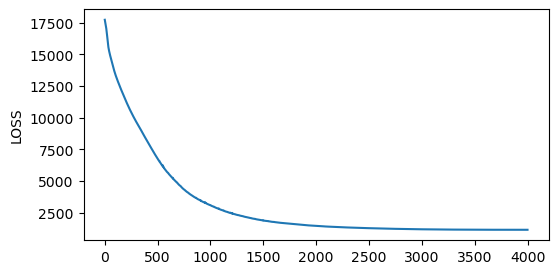

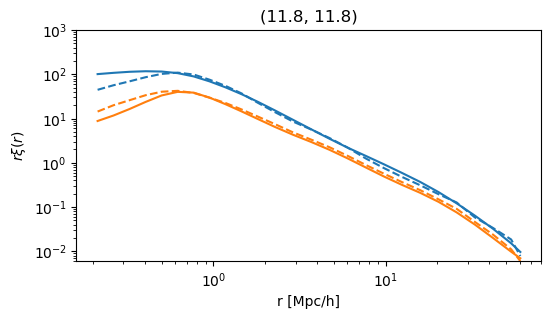

In [3]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from gal_goku import emus_multifid
importlib.reload(emus_multifid)
import os.path as op
import pickle

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
all_mass_pairs = [(11.8, 11.8)]
wide_narrow = [False]
all_model_files = ['Xi_Native_emu_mapirs2_spline_11.8_11.8_wide.pkl']

for i in range(len(all_mass_pairs)):

    mass_pair = all_mass_pairs[i]
    emu_type = {'wide_and_narrow':wide_narrow[i]}
    model_file = all_model_files[i]
    
    # Plot true vs prediction
    xi_emu = emus_multifid.XiNativeBins(data_dir, interp='spline', mass_pair=mass_pair, logging_level='ERROR', emu_type=emu_type)

    # plot LOSS
    with open(op.join(data_dir, model_file+'.attrs'), 'rb') as f:
        attrs = pickle.load(f)
        ind_train = attrs['ind_train']
        ind_test = np.delete(np.arange(21), ind_train)
        loss_history = attrs['loss_history']
        print(f'ind_train: {ind_train}, ind_test: {ind_test}')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    ax.plot(loss_history)
    #ax.set_ylim(13_000, 15_000)
    ax.set_ylabel('LOSS')

    # Predict
    mean, var = xi_emu.predict(ind_test=ind_test, model_file=model_file)
    rbins = xi_emu.mbins

    fig, ax = plt.subplots(1,1, figsize=(6,3))
    for j in range(len(ind_test)):
        ax.plot(rbins, 10**xi_emu.Y[1][ind_test[j]], label='true', color=f'C{j}')
        ax.plot(rbins, 10**mean[j], label='pred', color=f'C{j}', linestyle='--')
        ax.set_ylim(0,1_000)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f'{mass_pair}')
        ax.set_xlabel('r [Mpc/h]')
        ax.set_ylabel(r'$r\xi(r)$')


## Wide+narrow:

In [ ]:
import numpy as np
import importlib
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
#mass_pair = (11.4,11.4)
mass_pair = (11.8, 11.8)
emu_type = {'wide_and_narrow':True}
xi_emu = emus_multifid.XiNativeBins(data_dir,  interp='spline', mass_pair=mass_pair, logging_level='DEBUG', emu_type=emu_type)


ind_test = np.array([2, 12])
ind_train=np.delete(np.arange(36), ind_test)
xi_emu.train(ind_train=ind_train, model_file='Xi_Native_emu_mapirs2_spline_11.8_11.8.pkl')


2025-03-21 12:40:16.756698: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 12:40:16.759477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 12:40:16.769072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742578816.785087 3224587 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742578816.789850 3224587 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-21 12:40:16.807006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

summary_stats | 03/21/2025 12:40:19 PM | Rank 0 | DEBUG  |  Total sims files: 564 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2
summary_stats | 03/21/2025 12:40:19 PM | Rank 0 | DEBUG  |  Found 6.2 % of xi(r,n1,n2) is nan


 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:593: RuntimeWarning:invalid value encountered in log10


summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | INFO  |  L2, narrow= False, Found 21 sims with less than 35% of valid data points
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/all_ICs.json
BaseStatEmu | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Y_wide: (543, 26)
BaseStatEmu | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Y_wide: (543, 26)
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Total sims files: 563 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Total sims files: 563 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Found 0.7 % of xi(r,n1,n2) is nan
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | DEBUG  |  Found 0.7 % of xi(r,n1,n2) is nan
summary_stats | 03/21/2025 12:40:20 PM | Rank 0 | INFO  |  L2, narrow= True, Found 0 sims with less than 35% of valid data 

2025-03-21 12:40:20.816143: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


🔹 Optimizing...
Instructions for updating:
Use fn_output_signature instead
🔹 Iteration 0: ELBO = 32209.494778558375
🔹 Iteration 10: ELBO = 31525.62189418581
🔹 Iteration 20: ELBO = 30745.033216158536
🔹 Iteration 30: ELBO = 29939.996458070204
🔹 Iteration 40: ELBO = 29333.932619307838
🔹 Iteration 50: ELBO = 28768.632294273157
🔹 Iteration 60: ELBO = 28183.710024348104
🔹 Iteration 70: ELBO = 27594.846464236103
🔹 Iteration 80: ELBO = 27048.78050069549
🔹 Iteration 90: ELBO = 26549.414866461277
🔹 Iteration 100: ELBO = 26080.032359296823
🔹 Iteration 110: ELBO = 25625.735870291373
🔹 Iteration 120: ELBO = 25180.79164547869
🔹 Iteration 130: ELBO = 24743.917570837548
🔹 Iteration 140: ELBO = 24314.405302446088
🔹 Iteration 150: ELBO = 23892.143614325814
🔹 Iteration 160: ELBO = 23477.87714008586
🔹 Iteration 170: ELBO = 23070.369397564085
🔹 Iteration 180: ELBO = 22670.73542532747
🔹 Iteration 190: ELBO = 22279.697343174314
🔹 Iteration 200: ELBO = 21897.473209618794
🔹 Iteration 210: ELBO = 21524.67707018

 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:593: RuntimeWarning:invalid value encountered in log10


ind_train: [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 25 26
 27 28 29 30 31 32 34 35], ind_test: [ 2 12 24 33]


 /tmp/ipykernel_3224587/2283374032.py:43: UserWarning:Attempt to set non-positive ylim on a log-scaled axis will be ignored.


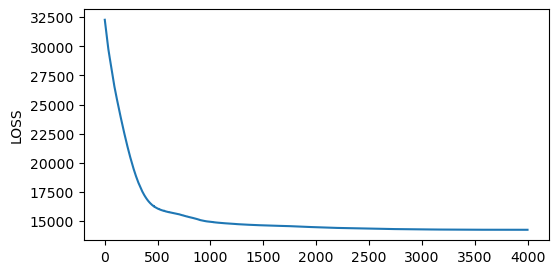

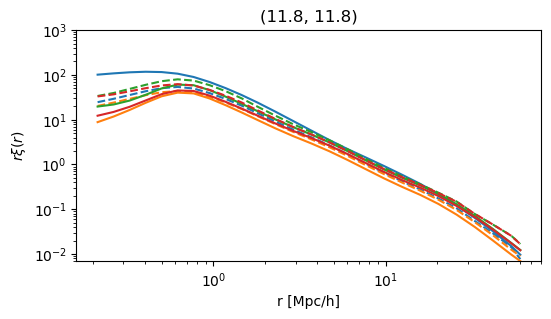

In [10]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from gal_goku import emus_multifid
importlib.reload(emus_multifid)
import os.path as op
import pickle

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
all_mass_pairs = [(11.8, 11.8)]
wide_narrow = [True]
all_model_files = ['Xi_Native_emu_mapirs2_spline_11.8_11.8.pkl']

for i in range(len(all_mass_pairs)):

    mass_pair = all_mass_pairs[i]
    emu_type = {'wide_and_narrow':wide_narrow[i]}
    model_file = all_model_files[i]
    
    # Plot true vs prediction
    xi_emu = emus_multifid.XiNativeBins(data_dir, interp='spline', mass_pair=mass_pair, logging_level='ERROR', emu_type=emu_type)

    # plot LOSS
    with open(op.join(data_dir, model_file+'.attrs'), 'rb') as f:
        attrs = pickle.load(f)
        ind_train = attrs['ind_train']
        ind_test = np.delete(np.arange(36), ind_train)
        loss_history = attrs['loss_history']
        print(f'ind_train: {ind_train}, ind_test: {ind_test}')
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    ax.plot(loss_history)
    #ax.set_ylim(13_000, 15_000)
    ax.set_ylabel('LOSS')

    # Predict
    mean, var = xi_emu.predict(ind_test=ind_test, model_file=model_file)
    rbins = xi_emu.mbins

    fig, ax = plt.subplots(1,1, figsize=(6,3))
    for j in range(len(ind_test)):
        ax.plot(rbins, 10**xi_emu.Y[1][ind_test[j]], label='true', color=f'C{j}')
        ax.plot(rbins, 10**mean[j], label='pred', color=f'C{j}', linestyle='--')
        ax.set_ylim(0,1_000)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f'{mass_pair}')
        ax.set_xlabel('r [Mpc/h]')
        ax.set_ylabel(r'$r\xi(r)$')


Wide+Narrow emulator does not have a better pefromance on Wide sims than side emulator.

In [3]:
import pickle
a = {2:3, 4:5}

with open('test.pkl', 'wb') as f:
    pickle.dump(a, f)

with open('test.pkl', 'rb') as f:
    b = pickle.load(f)
    print(b)

{2: 3, 4: 5}


In [4]:
rm test.pkl